<a href="https://colab.research.google.com/github/papaemeritius/datasciencecoursera/blob/master/CapstoneProject_VGG16Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Preprocessing for VGG Model.

In this we will:
1. Mount the gdrive.
2. unzip the data of pnuemonia
3. import all the libraries which will be required to create the model
4. create a negative and positive class segregation (where negative data contains [Target] == 0 and positive data contains [Target] == 1)
5. will convert images to jpg, will resize them and will segregate them into positive and negative images, and will store them in new created folders.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!unzip /content/drive/MyDrive/rsna-pneumonia-detection-challenge.zip

Streaming output truncated to the last 5000 lines.
  inflating: stage_2_train_images/d5231546-354e-4071-9af1-6644beabfd86.dcm  
  inflating: stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: stage_2_train_images/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm  
  inflating: stage_2_trai

In [3]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 8.3 MB/s 


In [4]:
# import the libraries as shown below

import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os,shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import pydicom as dicom
from skimage.transform import resize
import cv2
import seaborn as sns
sns.set_style('darkgrid')

In [5]:
df=pd.read_csv('/content/stage_2_train_labels.csv')
df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [6]:
df['path']='stage_2_train_images/'+df['patientId'].astype(str)+'.dcm'

In [7]:
df['path'][0]

'stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm'

In [8]:
negative=df[df['Target']==0]
print(len(negative))
negative.head()

20672


,patientId,x,y,width,height,Target,path
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,stage_2_train_images/0004cfab-14fd-4e49-80ba-6...
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,stage_2_train_images/00313ee0-9eaa-42f4-b0ab-c...
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,stage_2_train_images/00322d4d-1c29-4943-afc9-b...
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,stage_2_train_images/003d8fa0-6bf1-40ed-b54c-a...
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,stage_2_train_images/00569f44-917d-4c86-a842-8...


In [9]:
positive=df[df['Target']==1]
unique_positive=positive[['path','patientId']]
path=unique_positive['path'].unique()
patientId=unique_positive['patientId'].unique()

In [10]:
os.mkdir('/content/data')

os.mkdir('/content/data/positive')

os.mkdir('/content/data/negative')

In [11]:
# resizing and putting positive images to the positive folder. Also, converting images to jpg format.
for _,row in tqdm(unique_positive.iterrows()):
    img=dicom.read_file(row['path']).pixel_array
    img=resize(img,(224,224))
    plt.imsave('/content/data/positive/'+row['patientId']+'.jpg',img,cmap='gray')

9555it [08:54, 17.89it/s]


In [12]:

for _,row in tqdm(negative.iterrows()):
    img=dicom.read_file(row['path']).pixel_array
    img=resize(img,(224,224))
    plt.imsave('data/negative/'+row['patientId']+'.jpg',img,cmap='gray')

20672it [18:54, 18.22it/s]


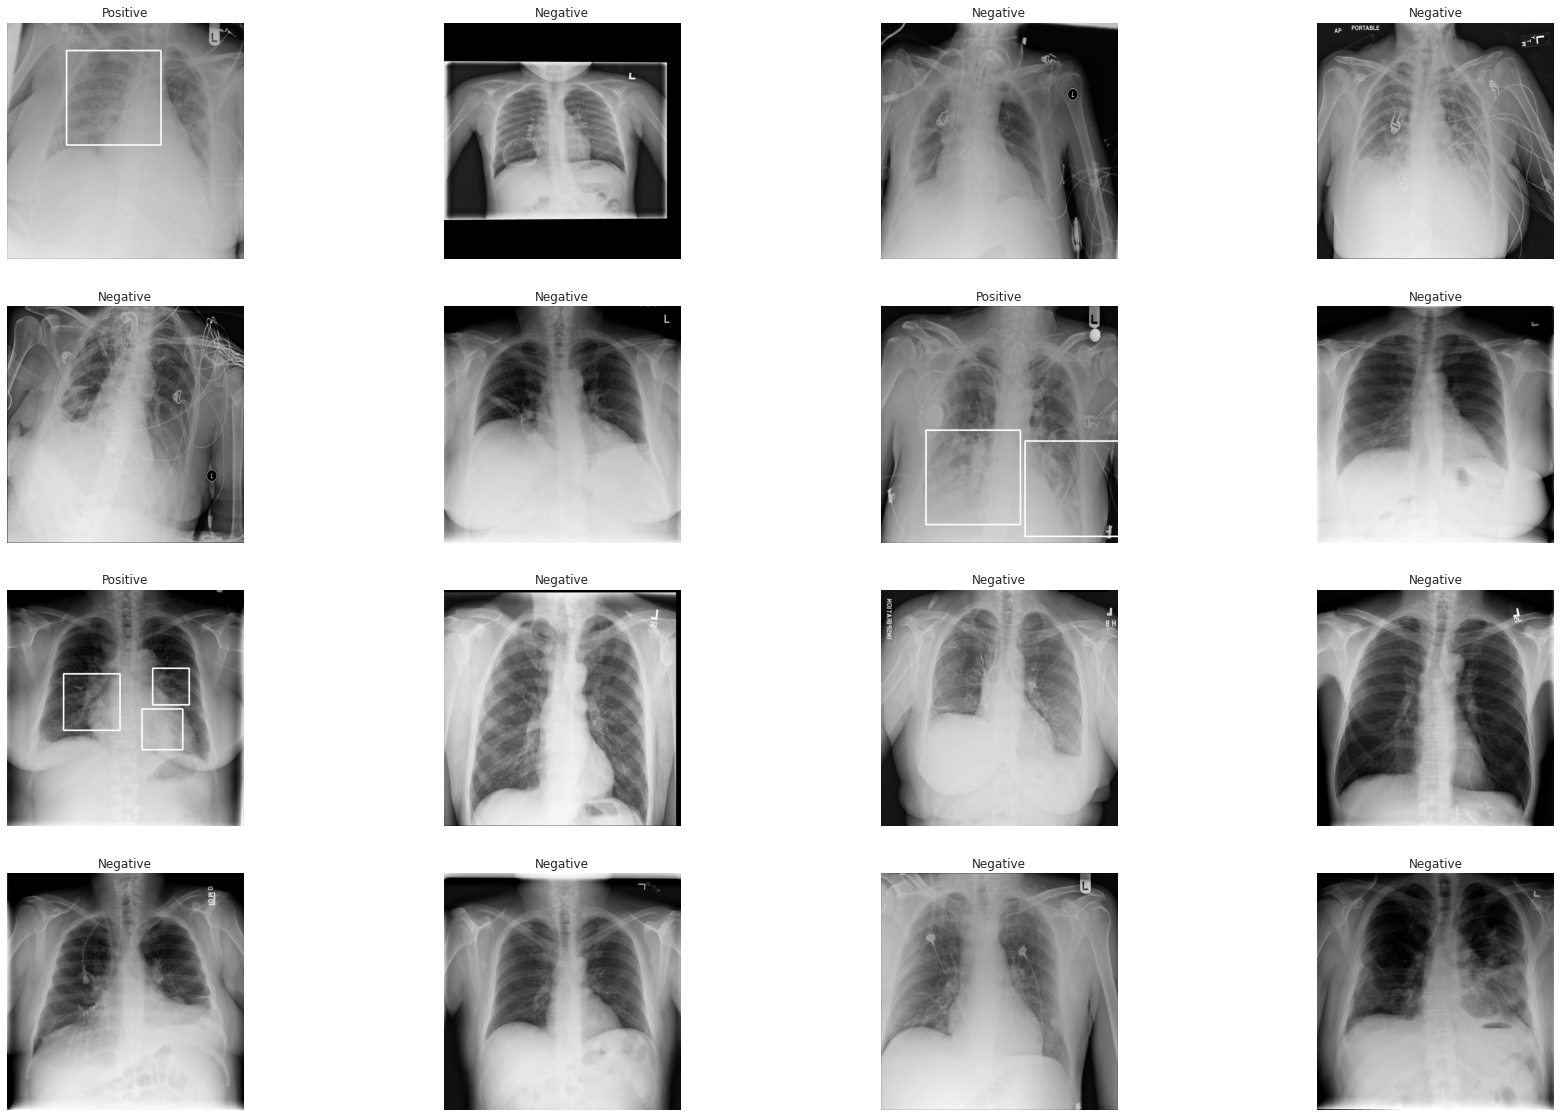

In [13]:
plt.figure(figsize=(30,20))
for j,img in enumerate(os.listdir('stage_2_train_images')):
    path=os.path.join('stage_2_train_images',img)
    tar=df[df['path']==path]['Target'].values[0]
    img=dicom.read_file(path).pixel_array
    plt.subplot(4,4,j+1)
    plt.axis('off')
    if tar==0:
        plt.title('Negative')
    else:
        plt.title('Positive')
        
        s=df[df['path']==path]
        
        for _,row in s.iterrows():
            x=int(row['x'])
            y=int(row['y'])
            w=int(row['width'])
            h=int(row['height'])
            cv2.rectangle(img,(x,y),(x+h,y+h),(255,255,0),5)
    plt.imshow(img,cmap='gray')
    if(j==15):
        break

### VGG Model Creation
Here we will be creating data to feed into the vgg model. Along with that we will imagenet weights for transfer learning and will add few more layers to the vgg model.

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Augementation with Image Generator

In [34]:
#rescaling,normalizing and doing validation split
datagen=ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True,horizontal_flip=True,
                          width_shift_range=0.05,rescale=1/255,fill_mode='nearest',height_shift_range=0.05,
                           preprocessing_function=preprocess_input,validation_split=0.3,
                          )

In [35]:
#preparing test and train data
train=datagen.flow_from_directory('data',color_mode='rgb',batch_size=128,class_mode='binary',subset='training')
test=datagen.flow_from_directory('data',color_mode='rgb',batch_size=32,class_mode='binary',subset='validation')

Found 18680 images belonging to 2 classes.
Found 8004 images belonging to 2 classes.


In [36]:
# using imagenet weights
pre_trained_model = VGG16(input_shape = (256,256,3), 
                                include_top = False, 
                                weights = 'imagenet')

In [37]:
for layer in pre_trained_model.layers:
  layer.trainable = False

# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 512)


In [38]:
# adding sequential layers to the vgg model
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,LeakyReLU,GaussianDropout

model = Flatten()(last_output)
model = Dense(1024)(model)
model = LeakyReLU(0.1)(model)
model = Dropout(0.25)(model)
model = BatchNormalization()(model)
model = Dense(1024)(model)
model = LeakyReLU(0.1)(model)
model = Dropout(0.25)(model)
model = BatchNormalization()(model)
model = Dense(1, activation='sigmoid')(model)

In [39]:
from tensorflow.keras.models import Model


fmodel = Model( pre_trained_model.input, model) 

fmodel.compile(optimizer = 'sgd', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
fmodel.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [40]:
# implementing early stopping and giving range of learning rate values so if the model accuracy saturates then learning rate will be reduced.
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


early=EarlyStopping(monitor='accuracy',patience=3,mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, verbose=1,cooldown=0, mode='auto',min_delta=0.0001, min_lr=1e-5)

In [41]:
class_weight={0:1,1:3.3}

In [42]:
fmodel.fit(train,epochs=25,callbacks=[reduce_lr],steps_per_epoch=100,validation_data=test,class_weight=class_weight)

Epoch 1/25
100/100 [==============================] - 357s 4s/step - loss: 0.9562 - accuracy: 0.6657 - val_loss: 0.4696 - val_accuracy: 0.7874
Epoch 2/25
100/100 [==============================] - 317s 3s/step - loss: 0.8415 - accuracy: 0.7086 - val_loss: 0.6652 - val_accuracy: 0.6482
Epoch 3/25
100/100 [==============================] - 316s 3s/step - loss: 0.8241 - accuracy: 0.7216 - val_loss: 0.6329 - val_accuracy: 0.6743
Epoch 4/25
100/100 [==============================] - 314s 3s/step - loss: 0.7827 - accuracy: 0.7426 - val_loss: 0.4364 - val_accuracy: 0.8002
Epoch 5/25
100/100 [==============================] - 315s 3s/step - loss: 0.7637 - accuracy: 0.7521 - val_loss: 0.4892 - val_accuracy: 0.7649
Epoch 6/25
100/100 [==============================] - 319s 3s/step - loss: 0.7612 - accuracy: 0.7516 - val_loss: 0.5450 - val_accuracy: 0.7354
Epoch 7/25
100/100 [==============================] - 315s 3s/step - loss: 0.7510 - accuracy: 0.7596 - val_loss: 0.4898 - val_accuracy: 0.7635

We can observe that the maximum validation accuracy achieved by model is 80%. If we compare the train and validation accurarcy we can observe that both accuracies are arounud 75%.



In [43]:
# saving the model for future
fmodel.save('/content/model2_vgg16.h5')

<Figure size 2160x1440 with 0 Axes>

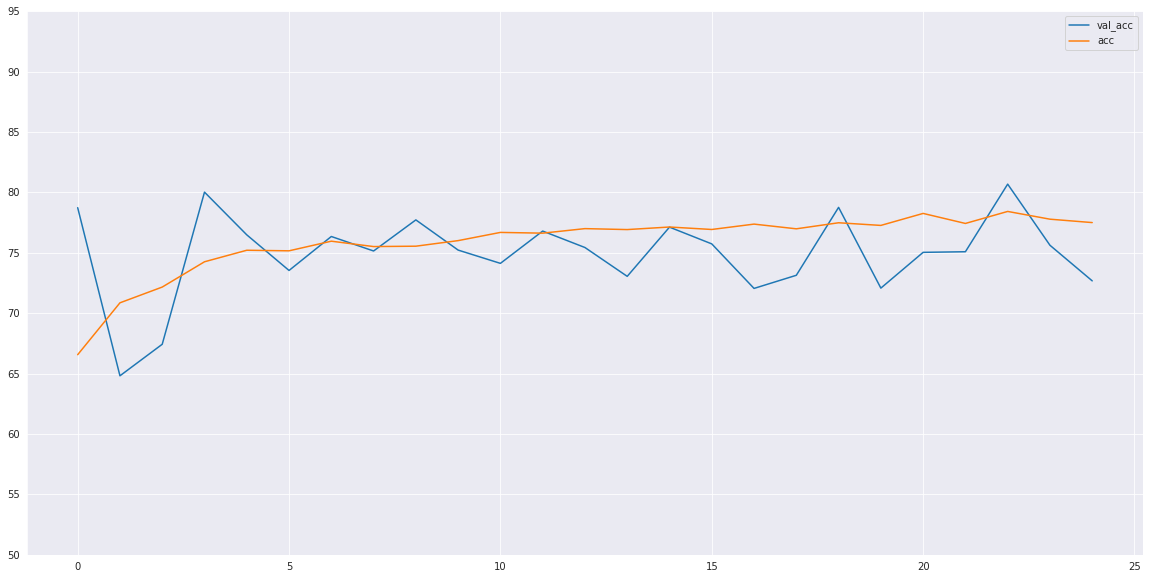

In [44]:
# Plot Accuracy
plt.figure(figsize=(30,20))
val_acc=np.asarray(fmodel.history.history['val_accuracy'])*100
acc=np.asarray(fmodel.history.history['accuracy'])*100
acc=pd.DataFrame({'val_acc':val_acc,'acc':acc})
acc.plot(figsize=(20,10),yticks=range(50,100,5))

By plotting the accuracy graph we can observe that the train accuracy is around 75% for all 25 epochs whereas validation accuracy fluctuates between 70% to 75%.

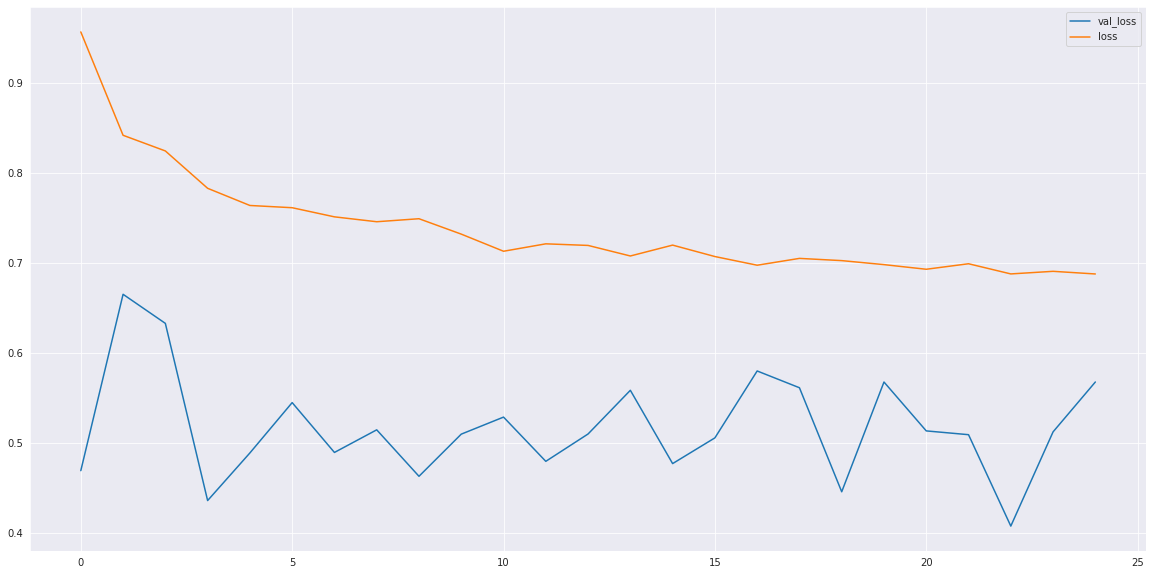

In [45]:
# Plot loss
loss=fmodel.history.history['loss']
val_loss=fmodel.history.history['val_loss']
loss=pd.DataFrame({'val_loss':val_loss,'loss':loss})
loss.plot(figsize=(20,10))

On checking training loss we can see that it reduces from 95% to around 70% as the training progresses. While the validaation loss is fluctuating around 50%.

#### Prediction of test data set

In [46]:
y=[]

test.reset()

for i in tqdm(range(84)):
    _,tar=test.__getitem__(i)
    for j in tar:
        y.append(j)

100%|██████████| 84/84 [00:33<00:00,  2.49it/s]


In [47]:
test.reset()
y_pred=fmodel.predict(test)

In [48]:
pred=[]
for i in y_pred:
    if i[0]>=0.7:
        pred.append(1)
    else:
        pred.append(0)

In [49]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve,classification_report

In [50]:
print(classification_report(y,pred[:len(y)]))

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      2054
         1.0       0.54      0.65      0.59       634

    accuracy                           0.79      2688
   macro avg       0.71      0.74      0.72      2688
weighted avg       0.80      0.79      0.79      2688



From the clasification report above we can see that accuracy is 79% on test data. While f1 score for negative class is 86% but for positive class it's 59% which indicates effect of imbalanced dataset.

The area under the curve is: 0.8341168574666957


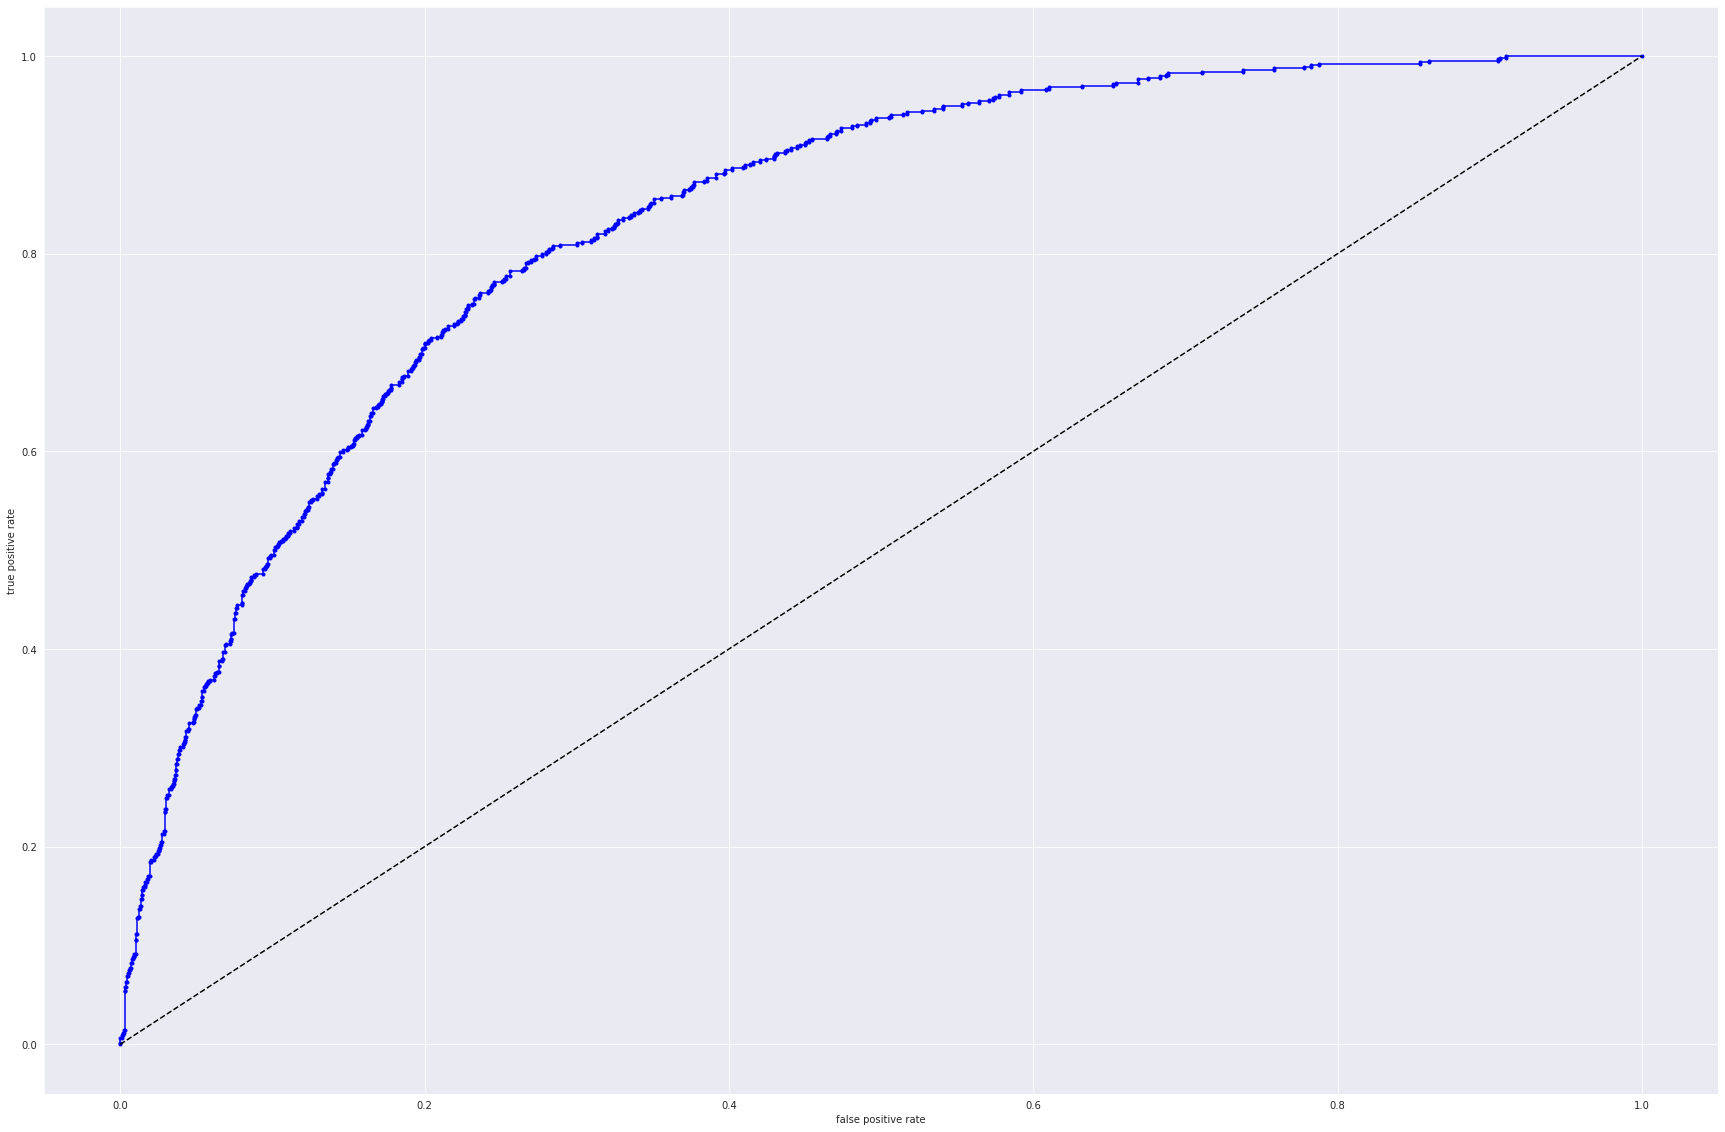

In [51]:
plt.figure(figsize=(30,20))
fpr,tpr,_=roc_curve(y,y_pred[:len(y)])
area_under_curve=auc(fpr,tpr)
print('The area under the curve is:',area_under_curve)
# Plot area under curve
plt.plot(fpr,tpr,'b.-')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr,fpr,linestyle='--',color='black')

The area under the ROC curve is around 83% which indicates that the model has actually learned from the dataset and is able to distinguish between classes.